# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

**Добрый день, уважаемый проверяющий.** Я очень старался, делая это задание, надеюсь и вам будет приятно его проверять. Иногда я использовал стандартный plt (а не sns), чтобы разобраться в базовой библиотеке, надеюсь это не проблема.

In [42]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

print("Success")

You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Success


### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [43]:
PATH_TO_DATASET = "titanik.csv"

In [44]:
data = pd.read_csv(PATH_TO_DATASET)
# data

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [45]:
train = data.sample(frac=0.7, random_state=0).sort_values(by='PassengerId')
test = data.drop(train.index).sort_values(by='PassengerId').reset_index(drop=True)
train.reset_index(drop=True, inplace=True)
# print(train["PassengerId"], test["PassengerId"])

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [46]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [47]:
train, train_target = get_features_and_target(train)
test, test_target = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

**Здесь я решил проверить как устроена таблица, чтобы удостовериться о типах и пропусках.**

In [48]:
print("NaNs:\n\n", train.isna().sum())

print("\nTypes:\n\n", train.dtypes)

NaNs:

 Pclass      0
Sex         0
Age       121
SibSp       0
Parch       0
Fare        0
dtype: int64

Types:

 Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object


**Создадим функцию plot_data, с помощью которой построим 6 графиков с зависимостями каждой величины (Pclass/Sex/...) от целевого признака. Разместим их на одной Figure.**

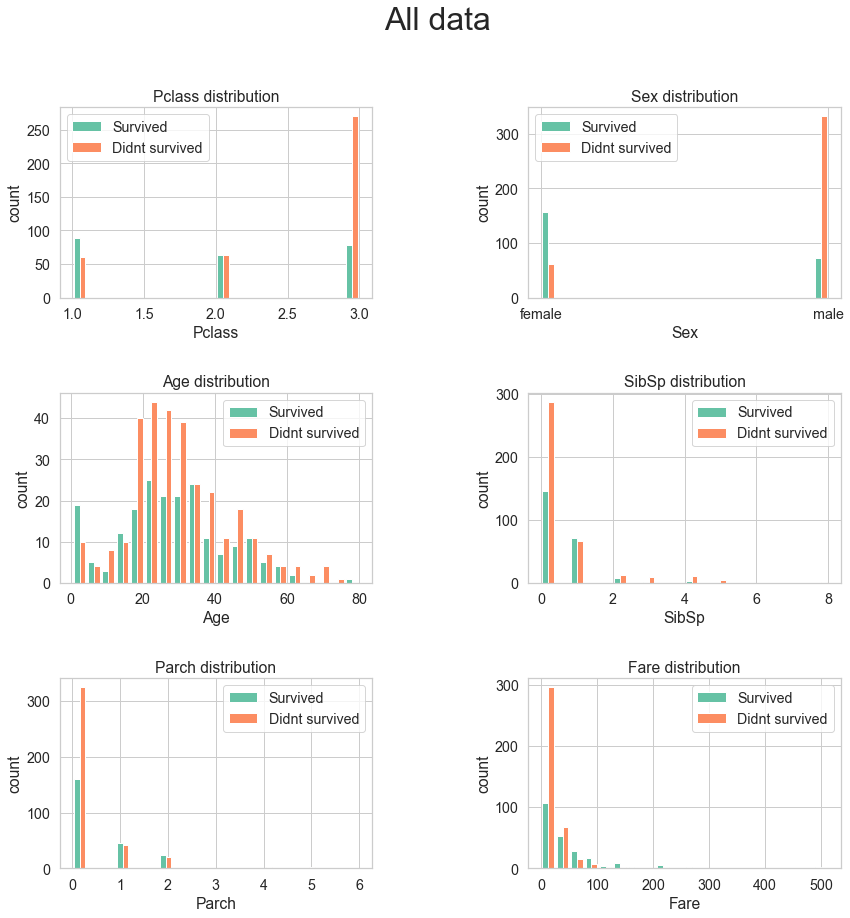

In [49]:
plt.rcParams['figure.figsize'] = [14, 14]

def plot_data(data, target, label):
    fig, axs = plt.subplots(3, 2)
    fig.suptitle(label, fontsize=32)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for i, column in enumerate(train.columns):
        ax = axs[i // 2][i % 2]
        ax.hist([data[target == 1][column], data[target == 0][column]],
                    bins=20, label=['Survived', 'Didnt survived'])
        ax.legend()
        ax.set_title(f'{str(column)} distribution')
        ax.set_xlabel(column)
        ax.set_ylabel("count")

plot_data(train, train_target, "All data")

**Разделим людей по признаку Sex и рассмотрим отдельно данные для мужчин и женщин**

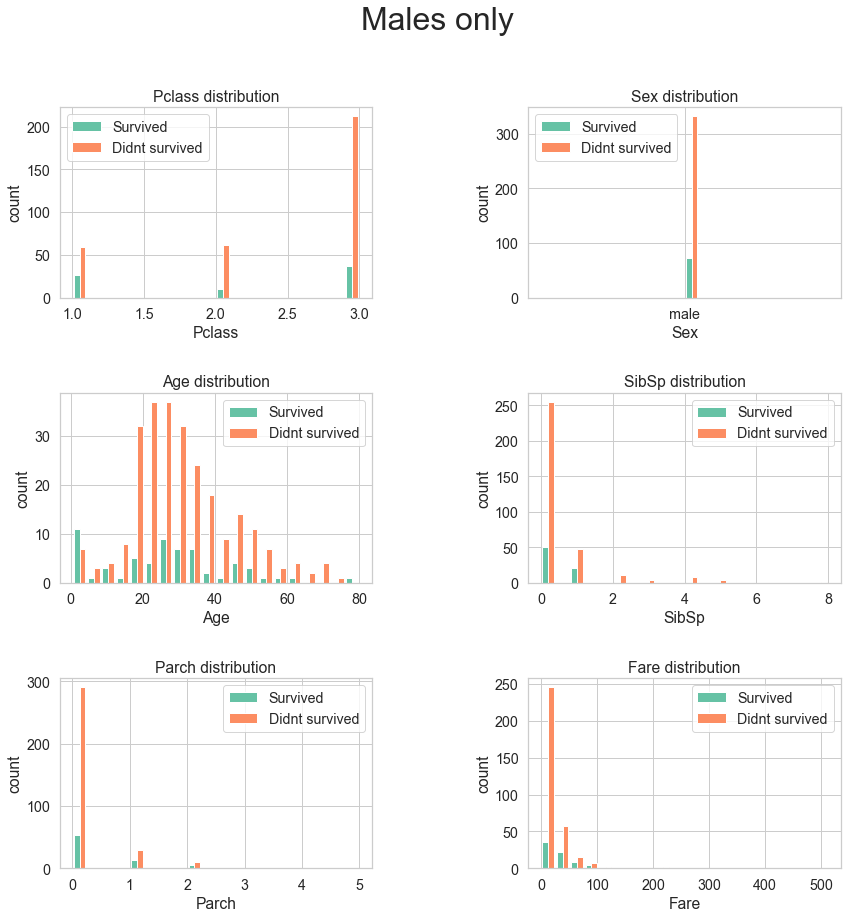

In [50]:
plot_data(train[train["Sex"] == 'male'], train_target[train["Sex"] == 'male'], "Males only")

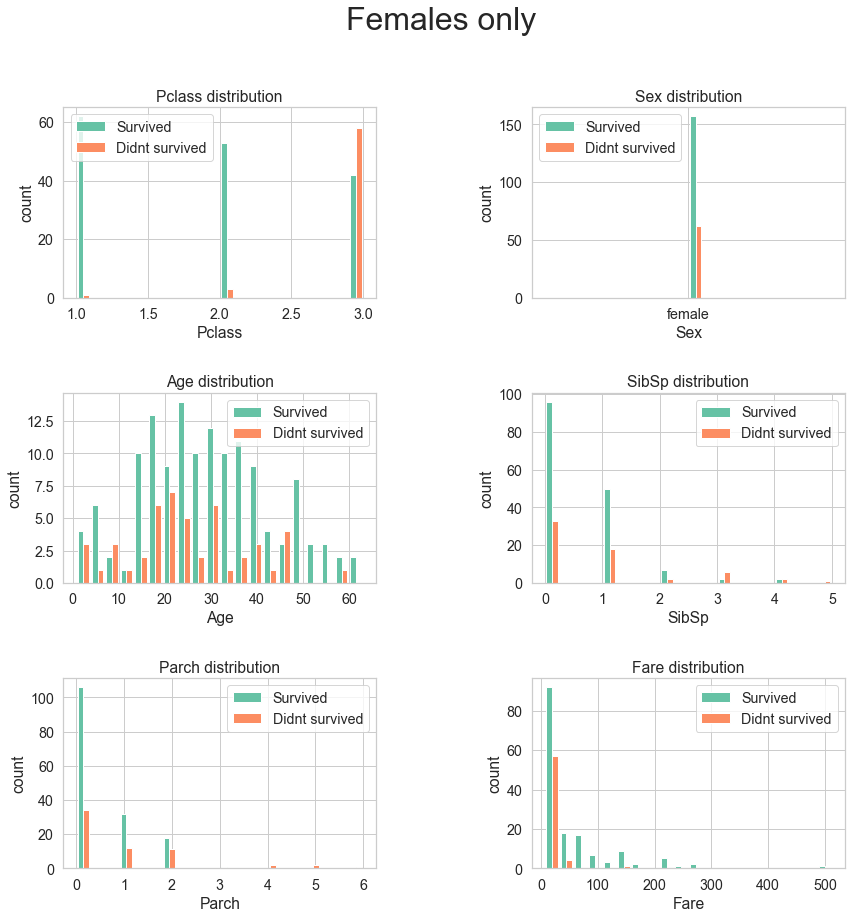

In [51]:
plot_data(train[train["Sex"] == 'female'], train_target[train["Sex"] == 'female'], "Females only")

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков).

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

**Легко заметить, что есть женщины чаще выживают, мужчины чаще - нет.**

**Дерево 2:**

**После выбора первичного признака, попробуем подробнее рассмотреть мужчин и женщин отдельно.\
Заметим, что женщины с Pclass = 3 реже выживают, чем умирают.\
Заметим, что мужчины с небольшим Age чаще выживают, чем умирают.\
В обоих утверждениях имеется логика, к тому же.**

Реализуйте полученные деревья по шаблону,

In [52]:
'''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
'''
def tree1(features):
    prediction = (features["Sex"] == 'female')
    return prediction.apply(lambda x: 1 if x else 0)

def tree2(features):
    female = (features["Sex"] == 'female')
    klass = (features["Pclass"] < 2.5)
    age = (features["Age"] < 5)
    return ((female & klass) | (~female & age)).apply(lambda x: 1 if x else 0)

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

**Соотношение верно угаданных ко всем.** 

Реализуйте данный критерий по шаблону

In [53]:
def criteria(target, predicted):
    array = (target == predicted)
    return len(array[array == True]) / len(array)

Посчитайте качество полученных ранее деревьев

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

**Выведем качество деревьев на тренировочной выборке(нерепрезентативно) и на контрольной.**

In [54]:
print(f"!Нерепрезентативно!, дерево глубины 1: {criteria(train_target, tree1(train))}")
print(f"!Нерепрезентативно!, дерево глубины 2: {criteria(train_target, tree2(train))}")
print()
print(f"Дерево глубины 1: {criteria(test_target, tree1(test))}")
print(f"Дерево глубины 2: {criteria(test_target, tree2(test))}")

!Нерепрезентативно!, дерево глубины 1: 0.7836538461538461
!Нерепрезентативно!, дерево глубины 2: 0.8157051282051282

Дерево глубины 1: 0.7940074906367042
Дерево глубины 2: 0.7453183520599251


#### 5. Выводы

**После анализа графиков различных признаков в зависимости от целевого признака удалось найти признаки, по которым были построены решающие деревья. Признаки: Sex(первичный), Age и Pclass.**

**Несмотря на успешность дерева глубиной 2 на учебной выборке - на тестовых данных оно себя показало хуже, чем простое дерево глубиной 1.**


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

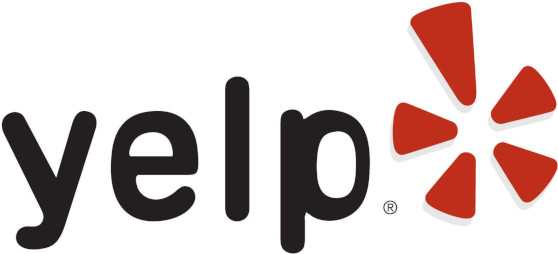

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

### Note: В этом задании пояснения часто излишни, ведь задания вполне исчерпывающие.

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [55]:
data = pd.read_csv("yelp_business.csv")
data.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [56]:
top = data.groupby("city").count().sort_values(by="business_id", ascending=False).head(5)
target_city = top.index[0]
top

,Unnamed: 0,business_id,name,neighborhood,address,state,postal_code,latitude,longitude,is_open,categories
city,,,,,,,,,,,
Las Vegas,26775,26775,26775,21887,26775,26775,26655,26775,26775,26775,26775
Phoenix,17213,17213,17213,0,17213,17213,17121,17213,17213,17213,17213
Toronto,17206,17206,17206,14064,17206,17206,17102,17205,17205,17206,17206
Charlotte,8553,8553,8553,5844,8553,8553,8517,8553,8553,8553,8553
Scottsdale,8228,8228,8228,0,8228,8228,8201,8228,8228,8228,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [57]:
target_data = data[data.city == target_city]
target_data = target_data.drop('Unnamed: 0', axis='columns')

**Перед выполнением графической части второго задания(начиная с этого момента), ожидается, что первое задание было полностью запущено. Это повлияет на внешний вид графиков.** 

Text(0.5, 1.0, 'Las Vegas businesses')

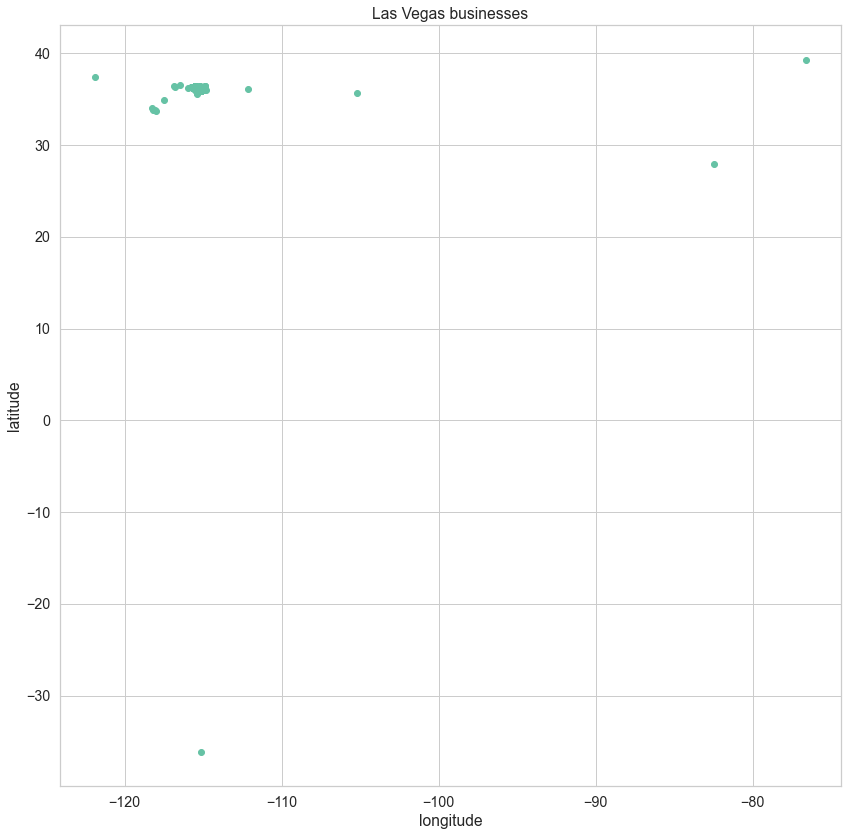

In [58]:
ax = plt.axes()
ax.scatter(target_data.longitude, target_data.latitude)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_title("Las Vegas businesses")

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

*Замечание. Подгружать карту города в качестве фона графика мы научимся чуть позже.*

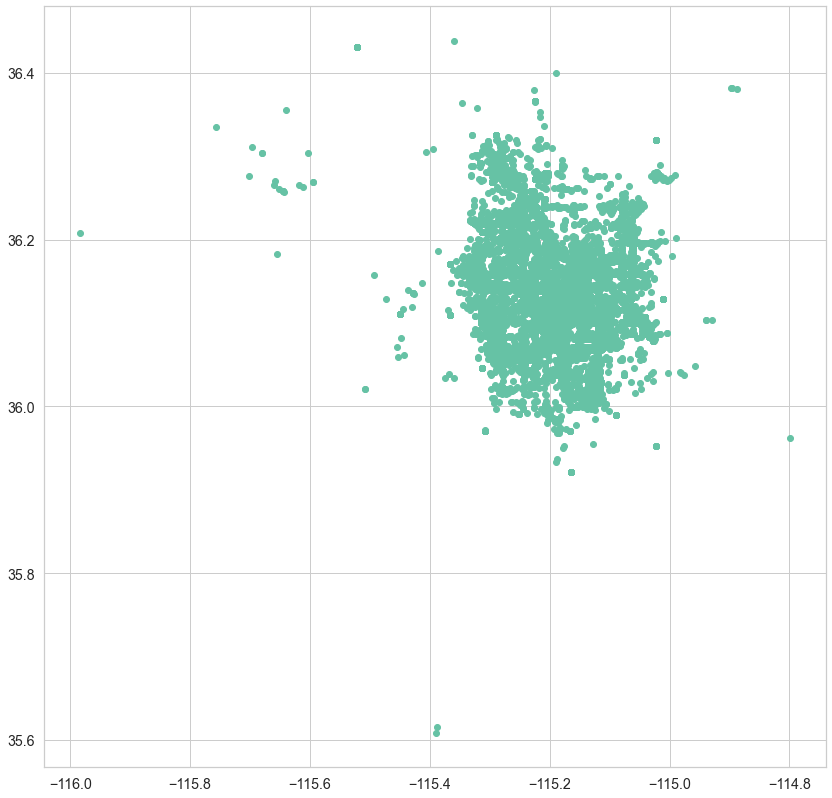

In [59]:
ax = plt.axes()
target_data = target_data[target_data.longitude.between(-116, -114) & target_data.latitude.between(35, 40)] 
ax.scatter(target_data.longitude, target_data.latitude)

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [60]:
reviews = pd.read_csv("yelp_review.csv")
reviews

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...,...
5261663,5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,5261666,EO3i5kTUG7_S2OIQ23sdSA,3


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [61]:
target_reviews = reviews.set_index("business_id").loc[target_data["business_id"]].reset_index()
target_reviews = target_reviews.reindex(columns=["business_id", "stars"])
target_reviews

,business_id,stars
0,kCoE3jvEtg6UVz5SOD3GVw,4
1,kCoE3jvEtg6UVz5SOD3GVw,1
2,kCoE3jvEtg6UVz5SOD3GVw,5
3,kCoE3jvEtg6UVz5SOD3GVw,5
4,kCoE3jvEtg6UVz5SOD3GVw,5
...,...,...
1603437,9ouC6BpmjFpLfHeQnLQqng,5
1603438,9ouC6BpmjFpLfHeQnLQqng,5
1603439,n9a-3YhibkMDUEgncIivHg,5
1603440,n9a-3YhibkMDUEgncIivHg,1


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [62]:
reviews_by_business = target_reviews.groupby("business_id").aggregate([np.mean, np.size])
reviews_by_business

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19
...                          ...   ...
zzOo9n22fBbKAhbSpMzggA  3.230769    26
zzXuJF6UUT1kgTyCsmgDmQ  5.000000     4
zzjqFOujmM9surbMANZ_ag  5.000000     3
zzsKbL1KMNJqazSqBXskxQ  3.666667     6
zzzaIBwimxVej4tY6qFOUQ  3.432432    37

[26761 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [63]:
reviews_by_business.columns = ['stars', 'count']

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

**Note: reviews_by_business - ключевая таблица, которая будет использоваться раз за разом.**

In [64]:
reviews_by_business = target_data.set_index("business_id").join(reviews_by_business)
reviews_by_business = reviews_by_business.reindex(columns=['latitude', 'longitude', 'categories', 'name', 'stars', 'count'])
reviews_by_business

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.134355,-115.224462,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",4.466667,15
pUhU5ohYv65g8B47dTXAKA,36.173589,-115.116779,Coffee & Tea;Food,"""Starbucks""",2.400000,35
sH9WsMj8sNTTSAUWv4UEEg,36.055130,-115.243488,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",3.857143,35


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

Text(0.5, 1.0, 'Businesses grades on map')

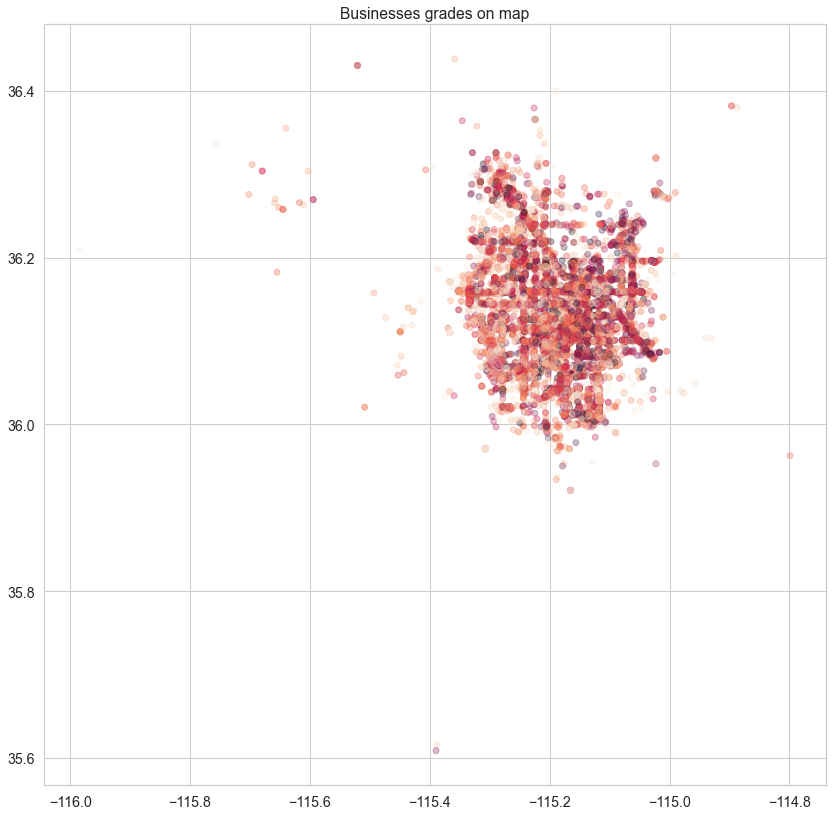

In [65]:
ax = plt.axes()
ax.scatter(reviews_by_business.longitude, reviews_by_business.latitude, c=reviews_by_business.stars, alpha=0.3)
ax.set_title("Businesses grades on map")

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [66]:
import copy
fineness = 4
reviews_by_area = copy.deepcopy(reviews_by_business)
reviews_by_area.latitude = reviews_by_area.latitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)
reviews_by_area.longitude = reviews_by_area.longitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

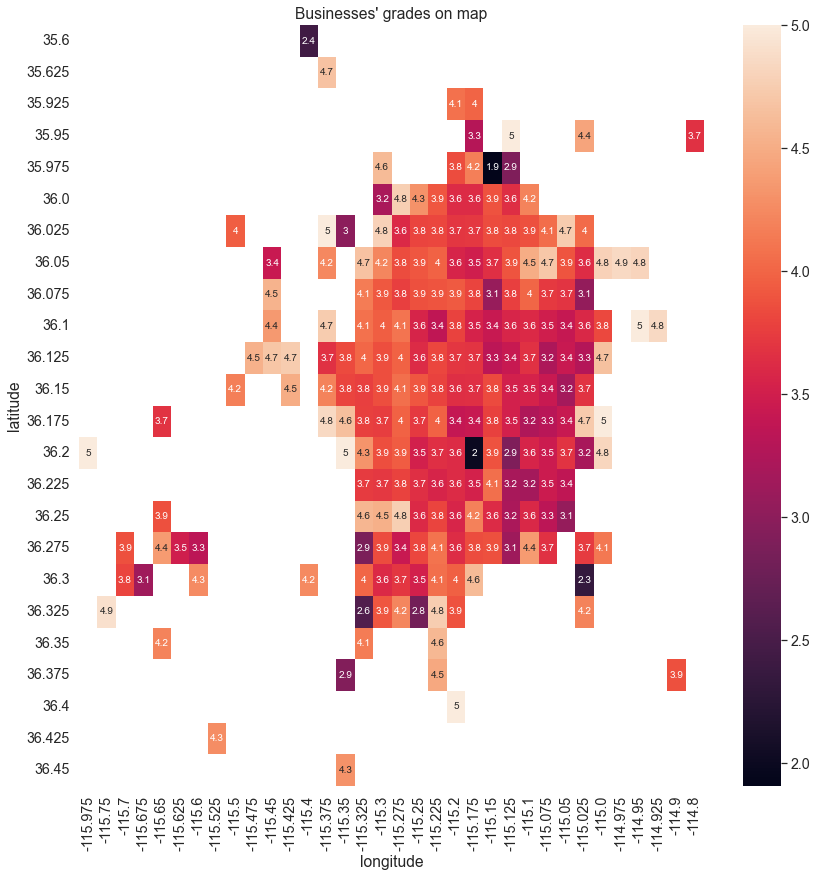

In [67]:
table = pd.pivot_table(reviews_by_area, index="latitude", columns="longitude", values="stars")
plt.axes().clear()
with sns.axes_style('whitegrid'):
    ax = sns.heatmap(table, annot=True)
    ax.set_title("Businesses' grades on map")

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** **Очевидно, когда в районе мало компаний (крайний случай - 1 компания), то на среднюю по району влияет не местоположение, а качество оказываемых услуг этой самой компанией. Когда компаний становится много, мы верим что этот под-датасет района переймёт все свойства большого датасета(в том числе распределение качества услуг).**

**Ну а по поводу цветовой гаммы - график просто становится визуально не информативным. В крайнем случае без параметров vmin и vmax, а также датасетом: (одна компанию с 5.0 и все остальные в районе 2.0) - получим одноцветный график, анализировать который невозможно.**

**Note: Вообще по хорошему стоит и компании с малым кол-вом оценок выбросить.** 

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
series = reviews_by_area.groupby(["latitude", "longitude"])["count"].count()
series = series[series >= 30]
reviews_by_area = reviews_by_area.reset_index().set_index(["latitude", "longitude"]).loc[series.index]
reviews_by_area = reviews_by_area.reset_index().set_index("business_id")

**После небольшой магии с индексами (основы которой были даны в условии данного notebook) и получив reviews_by_area с ресторанами из только популярных районов - построим heatmap.**

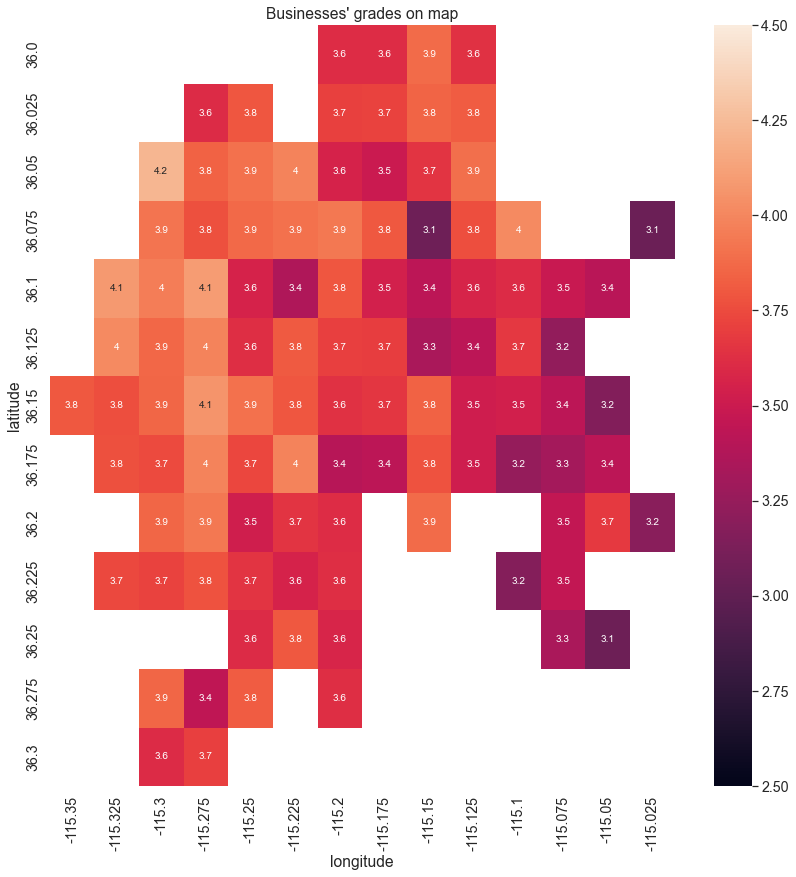

In [347]:
table = pd.pivot_table(reviews_by_area, index="latitude", columns="longitude", values="stars")
plt.axes().clear()
with sns.axes_style('whitegrid'):
    ax = sns.heatmap(table, annot=True, vmax=4.5, vmin=2.5)
    ax.set_title("Businesses' grades on map")

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** **Относительно предыдущего графика уменьшился рассматриваемый округ(ведь мы отбросили районы), диапазон цветов стал приемлемым. Стало отчётливо видно, что с западной стороны оценки выше. В рассмотренном округе самые высокие средние достигнуты на северо-западе, самые низкие на востоке/юго-востоке. Средняя варьируется между 3 и 4.2.**

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

**Note: соберём всё ранее написанное в функцию show_heatmap и применим её.**

In [38]:
def show_heatmap(reviews, vmin, vmax, title, area_lower_bound):
    fineness = 4
    reviews_by_area = copy.deepcopy(reviews)
    reviews_by_area.latitude = reviews_by_area.latitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)
    reviews_by_area.longitude = reviews_by_area.longitude.apply(lambda x: np.round(x * fineness, decimals=1) / fineness)
    series = reviews_by_area.groupby(["latitude", "longitude"])["count"].count()
    series = series[series >= area_lower_bound]
    reviews_by_area = reviews_by_area.reset_index().set_index(["latitude", "longitude"]).loc[series.index]
    reviews_by_area = reviews_by_area.reset_index().set_index("business_id")
    table = pd.pivot_table(reviews_by_area, index="latitude", columns="longitude", values="stars")
    plt.axes().clear()
    with sns.axes_style('whitegrid'):
        ax = sns.heatmap(table, annot=True, vmax=vmax, vmin=vmin)
        ax.set_title(title)

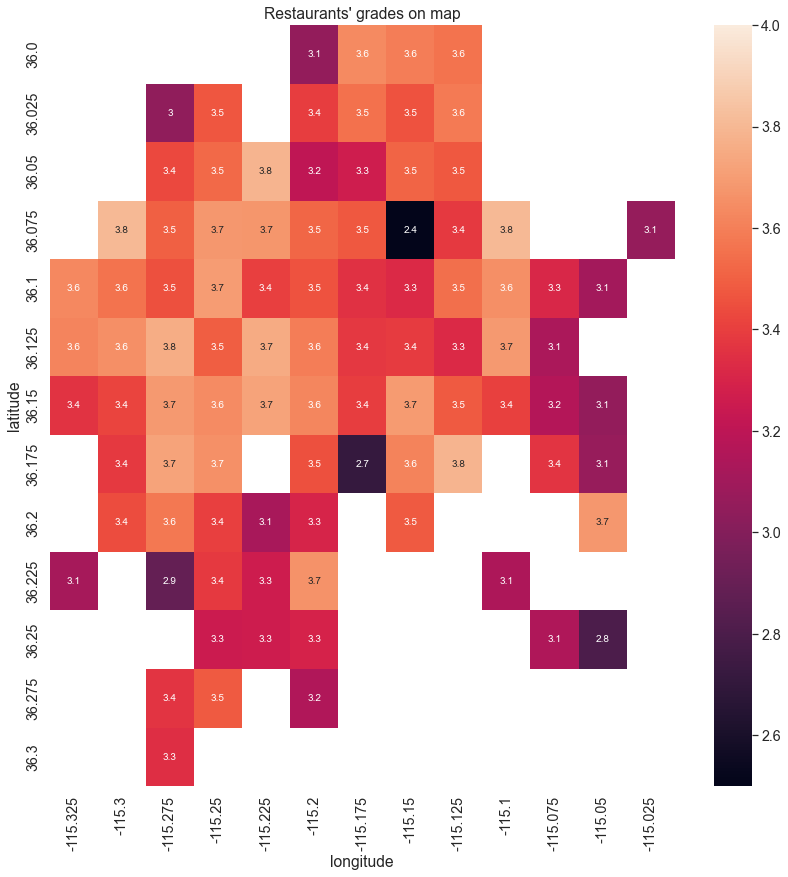

In [39]:
reviews_by_business["is_cafe"] = reviews_by_business["categories"].apply(lambda x: x.lower().find("restaurant") != -1)
reviews_by_restaurant = reviews_by_business[reviews_by_business["is_cafe"] == True]
reviews_by_restaurant = reviews_by_restaurant.drop(columns=["is_cafe"])
reviews_by_restaurant = reviews_by_restaurant[reviews_by_restaurant["count"] >= 5] # Expected table

show_heatmap(reviews_by_restaurant, 2.5, 4, "Restaurants\' grades on map", 10)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** **как и в прошлый раз - убираем нерепрезентативные районы. Делаем heatmap информативным.**

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [337]:
restaraunts_top = reviews_by_restaurant[reviews_by_restaurant["count"] >= 50].sort_values(by="stars", ascending=False).head(10).reindex(columns=["name", "stars", "count", "latitude", "longitude", "categories"])
restaraunts_top

,name,stars,count,latitude,longitude,categories
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [41]:
reviews_by_restaurant = reviews_by_restaurant[(reviews_by_restaurant["count"] >= 50) & (reviews_by_restaurant["stars"] >= 4.7)]

reviews_by_restaurant["is_popular"] = reviews_by_restaurant["count"].apply(lambda x: False)
reviews_by_restaurant.loc[restaraunts_top.index, "is_popular"] = True
with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=reviews_by_restaurant, x='longitude', y='latitude', hue='is_popular', s=100)
    ax.set_title("Top restaurants")


NameError: name 'restaraunts_top' is not defined

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** **Речь в задаче шла о городе Лас-Вегас. Согласно графикам "restautants/business grades on map" запад/северо-запад - районы с более качественными услугами, опираясь на оценки клиентов. С другой стороны восток/юго-восток предлагают менее качественные услуги, опираясь на оценки клиентов. Кот Василий действительно избирателен, ведь посещает самые известные и хорошо-оценённые рестораны, которые расположены в разных районах. Несмотря на успешность северо-запада в среднем, топовые рестораны расположены и в центре/на востоке также.**

---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

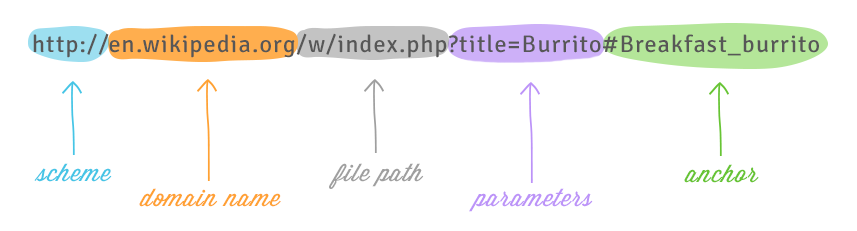

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [ ]:
from url_normalize import url_normalize

In [ ]:
...

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму для времени скачивания страницы.

In [ ]:
...

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

In [ ]:
...

**Выводы:** <...>